In [127]:
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score, mean_squared_error
from sklearn.decomposition import PCA
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB

from iaml_cw2_helpers import *
from iaml212cw2_my_helpers import *

In [2]:
X, Y = load_Q1_dataset()

Xtrn = X[100:,:]; Ytrn = Y[100:] # training set
# print(Xtrn.shape, Ytrn.shape)
Xtst = X[0:100,:]; Ytst = Y[0:100] # testing set

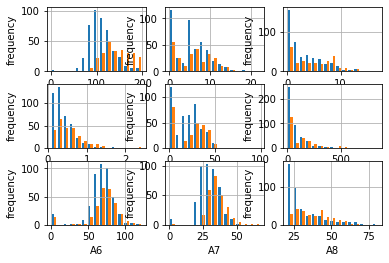

In [3]:
# Q1.1
def iaml212cw2_q1_1():
    Xa = Xtrn[np.where(Ytrn==0)[0]] #instances of class 0
    Xb = Xtrn[np.where(Ytrn==1)[0]] #instances of class 1

    fig, axs = plt.subplots(3, 3) #ploting 3 by 3 histogram
    axs = axs.ravel()

    for i in range(9):
        axs[i].hist([Xa[:,i], Xb[:,i]], bins=15)
        axs[i].set(xlabel=f"A{i}")

    for ax in axs.flat:
        ax.set(ylabel='frequency')
        ax.grid()
        # ax.label_outer()
    plt.savefig("results/1_1.png")
    plt.show()
iaml212cw2_q1_1()

In [4]:
# Q1.2
def iaml212cw2_q1_2():
    for i in range(9):
        print(np.corrcoef(Xtrn[:,i], Ytrn))
iaml212cw2_q1_2()

[[1.        0.4911759]
 [0.4911759 1.       ]]
[[1.        0.0874059]
 [0.0874059 1.       ]]
[[1.         0.22728719]
 [0.22728719 1.        ]]
[[1.         0.20736605]
 [0.20736605 1.        ]]
[[1.         0.10772035]
 [0.10772035 1.        ]]
[[1.        0.1856714]
 [0.1856714 1.       ]]
[[1.         0.07626074]
 [0.07626074 1.        ]]
[[1.         0.30445377]
 [0.30445377 1.        ]]
[[1.         0.24034733]
 [0.24034733 1.        ]]


The unbiased sample variance of each attribute are [[1.47690983e+04 5.00000000e+00]
 [1.00643383e+03 0.00000000e+00]
 [3.84441702e+02 6.00000000e+00]
 [2.54105042e+02 4.00000000e+00]
 [1.39627696e+02 8.00000000e+00]
 [6.35046985e+01 7.00000000e+00]
 [1.67234273e+01 1.00000000e+00]
 [1.15959710e+01 2.00000000e+00]
 [1.05915369e-01 3.00000000e+00]]


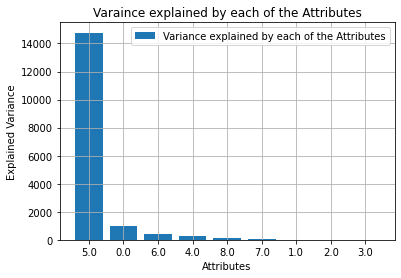

The sum of all the variances is 16645.63659972226
Cumulative explained variance ratio of each Attributes are [0.88726545 0.94772778 0.97082342 0.98608898 0.99447723 0.99829233
 0.999297   0.99999364 1.        ]


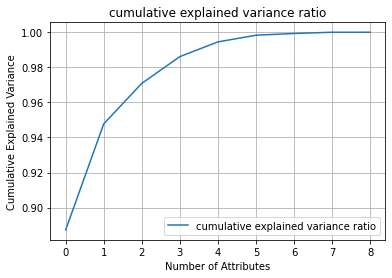

In [40]:
def iaml212cw2_q1_4():
    samVar = np.zeros((9,2)) #initialising numpy array to store the unbiased smaple variance
    # print(samVar)
    for i in range(9):
        #computing unbiased sample variance of each attribute
        vari = np.array([np.var(Xtrn[:,i], axis=0, ddof=1),str(i)])
        samVar[i]=vari
    samVar = samVar[samVar[:,0].argsort()[::-1]] #sorting in descending order
#     print(samVar)
    print(f"The unbiased sample variance of each attribute are {samVar}")
    # print(samVar[:,0])

    #Q1.4.1 plot
#     plt.plot(samVar[:,0], label="Varaince explained by each of the Attributes")
    plt.bar(range(len(samVar[:,0])), samVar[:,0], label="Variance explained by each of the Attributes")
    plt.title("Varaince explained by each of the Attributes")
    plt.xlabel("Attributes")
    plt.ylabel("Explained Variance")
    plt.xticks(np.arange(9), samVar[:,1].astype(str))
    plt.legend()
    plt.grid()
    plt.savefig("results/1_4_1.png")
    plt.show()

    sum = samVar.sum(axis=0)[0]
    print(f"The sum of all the variances is {sum}")
    cumsamVar = np.cumsum(samVar[:,0]/sum)
    print(f"Cumulative explained variance ratio of each Attributes are {cumsamVar}")
    #Q1.4.2 plot
    plt.plot(cumsamVar, label="cumulative explained variance ratio")
    plt.title("cumulative explained variance ratio")
    plt.xlabel("Number of Attributes")
    plt.ylabel("Cumulative Explained Variance")
#     plt.ylim(0,1)
    plt.xticks(np.arange(0,9))
    plt.legend()
    plt.grid()
    plt.savefig("results/1_4_2.png")
    plt.show()

iaml212cw2_q1_4() 

The total amount of variance is 16645.636599722264


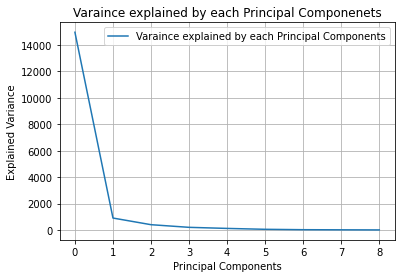

cumsumVar is [0.89934746 0.95338182 0.97716884 0.98891039 0.99575502 0.9985324
 0.99952546 0.99999406 1.        ]


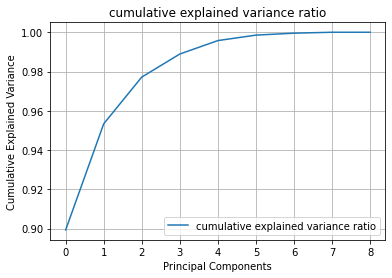

In [65]:
# # Q1.5
def iaml212cw2_q1_5():
    pca = PCA().fit(Xtrn)
#     print(pca.explained_variance_)
    # print(pca)
    # print(pca.explained_variance_)
    # print(np.cumsum(pca.explained_variance_ratio_))
    print(f"The total amount of variance is {sum(pca.explained_variance_)}")

    plt.plot(pca.explained_variance_, label="Varaince explained by each Principal Components")
    plt.title("Varaince explained by each Principal Componenets")
    plt.xlabel("Principal Components")
    plt.ylabel("Explained Variance")
    # plt.xticks(np.arange(9), samVar[:,1].astype(str))
    plt.legend()
    plt.grid()
    plt.savefig("results/1_5_1.png")
    plt.show()

    print(f"cumsumVar is {np.cumsum(pca.explained_variance_ratio_)}")
    plt.plot(np.cumsum(pca.explained_variance_ratio_), label="cumulative explained variance ratio")
    plt.title("cumulative explained variance ratio")
    plt.xlabel("Principal Components")
    plt.ylabel("Cumulative Explained Variance")
    # plt.xticks(np.arange(9), samVar[:,1].astype(str))
    plt.legend()
    plt.grid()
#     plt.ylim(0,1)
    plt.savefig("results/1_5_2.png")
    plt.show()
iaml212cw2_q1_5()   # comment this out when you run the function

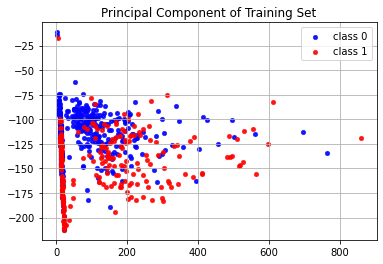

In [187]:
pca = PCA()
# Xtrn_m = Xtrn - Xtrn.mean(axis=0)
x2d = pca.fit(Xtrn)
compo = x2d.components_[0:2]
colours = ['b','r']

classes = [0,1]
newx = np.dot(Xtrn, compo.T)
for colour, target_name in zip(colours, classes):
    plt.scatter(newx[Ytrn==target_name, 0], newx[Ytrn==target_name, 1], color=colour, alpha=.8, s=10, 
                lw=2, label=f"class {target_name}")
    
plt.grid()
plt.legend()
plt.title("Principal Component of Training Set")
plt.show()

In [189]:
for i in range(9):
    print(np.corrcoef(Xtrn[:,i], newx[:,0])[0][1], np.corrcoef(Xtrn[:,i], newx[:,1])[0][1])
    

0.3855930142069001 -0.9142889454225336
-0.045825160822251125 -0.09077312003733048
-0.05705150513641671 -0.225462634782291
0.18579338880949564 -0.07987177012105033
0.4592402183572784 0.09716456539322534
0.9996780135176881 0.024084687085466964
0.10057182197062053 -0.25539200876602997
0.23230210476652122 -0.17260644028984354
-0.0015740705358918538 -0.3734437688312689


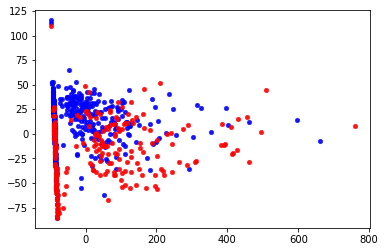

In [58]:
# pca = PCA(2)
# x2d = pca.fit_transform(Xtrn)
# colours = ['b','r']
# sub_cats = [0,1]
# lw=2
# for colour, target_name in zip(colours, sub_cats):
#     plt.scatter(x2d[Ytrn ==  target_name, 0], x2d[Ytrn == target_name, 1], color=colour, alpha=.8, lw=lw,
#                 label=target_name, s=10) 

In [192]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(Xtrn)
Xtrn_s = scaler.transform(Xtrn)
Xtst_s = scaler.transform(Xtst)

9.012875536480687


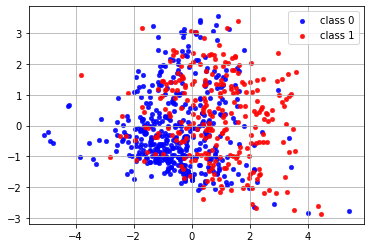

In [195]:
Xtrn_sm = Xtrn_s - Xtrn_s.mean(axis=0)
pca = PCA()
x2d = pca.fit(Xtrn_s)
print(sum(x2d.explained_variance_))
compo = x2d.components_[0:2] #PCA Components 
newx_s = np.dot(Xtrn_s, compo.T)
classes = [0,1]
for colour, target_name in zip(colours, classes):
    plt.scatter(newx_s[Ytrn==target_name, 0], newx_s[Ytrn==target_name, 1], c = colour, alpha=.8, lw=2,
                label=f"class {target_name}", s=10)
plt.legend()
plt.grid()
plt.show()


In [194]:
for i in range(9):
    print(np.corrcoef(Xtrn_s[:,i], newx_s[:,0])[0][1], np.corrcoef(Xtrn_s[:,i], newx_s[:,1])[0][1])

0.6006713897085358 0.1774322516435997
0.05729590985040152 0.10003686429568931
0.2679520322312 0.7599827142218684
0.3656554651376429 -0.207643371530096
0.6230382061060183 -0.46599042048329115
0.6298568548408795 -0.36979586693725947
0.5228507215944561 0.2242280865429318
0.6511607443951045 -0.16844950994503738
0.35286443238025417 0.7812491257116686


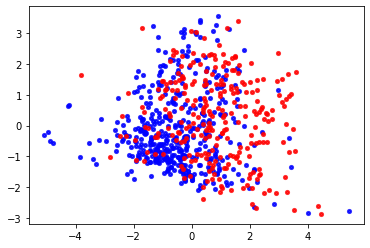

In [57]:
# pca = PCA(2)
# x2d = pca.fit_transform(Xtrn_s)
# colours = ['b','r']
# sub_cats = [0,1]
# lw=2
# for color, target_name in zip(colours, sub_cats):
#     plt.scatter(x2d[Ytrn ==  target_name, 0], x2d[Ytrn == target_name, 1], color=color, alpha=.8, lw=lw,
#                 label=target_name, s=10 ) 

In [80]:
grid = {"C":np.logspace(-2,2,13)}
cv = StratifiedKFold(n_splits=5)
result = GridSearchCV(SVC(), grid, cv=cv)
result.fit(Xtrn_s, Ytrn)

print("tuned hpyerparameters :(best parameters) ",result.best_params_)
print("accuracy :",result.best_score_)
means = result.cv_results_['mean_test_score']
stds = result.cv_results_['std_test_score']
params = result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


tuned hpyerparameters :(best parameters)  {'C': 0.46415888336127775}
accuracy : 0.7742857142857142
0.625714 (0.003499) with: {'C': 0.01}
0.625714 (0.003499) with: {'C': 0.021544346900318832}
0.642857 (0.010102) with: {'C': 0.046415888336127774}
0.748571 (0.034523) with: {'C': 0.1}
0.760000 (0.032135) with: {'C': 0.21544346900318834}
0.774286 (0.031168) with: {'C': 0.46415888336127775}
0.768571 (0.036589) with: {'C': 1.0}
0.761429 (0.027701) with: {'C': 2.154434690031882}
0.745714 (0.043236) with: {'C': 4.6415888336127775}
0.750000 (0.043566) with: {'C': 10.0}
0.720000 (0.055402) with: {'C': 21.54434690031882}
0.720000 (0.051784) with: {'C': 46.41588833612777}
0.721429 (0.047380) with: {'C': 100.0}


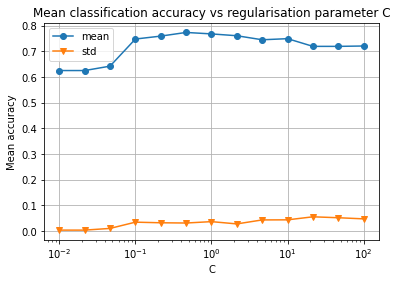

In [42]:
# cvals = [str(i) for i in np.logspace(-2,2,13)]

plt.plot(np.logspace(-2,2,13), means, 'o-', label="mean")
plt.plot(np.logspace(-2,2,13), stds, 'v-', label="std")
plt.xscale('log')
plt.title("Mean classification accuracy vs regularisation parameter C")
plt.xlabel("C")
plt.ylabel("Mean accuracy")
plt.grid()
plt.legend()
plt.savefig("results/1.8.png")
plt.show()

In [91]:
xxtrn = Xtrn[Ytrn==0]
Ztrn = xxtrn[xxtrn[:,4]>=1]
Ztrn = Ztrn[:,[4,7]]
print(Ztrn.shape)

(318, 2)


In [124]:
print(np.mean(Ztrn, axis=0))
mean = Ztrn.mean(axis=0)
print(np.cov(Ztrn[:,0], Ztrn[:,1], ddof=1))
# covmat = np.cov(Ztrn, ddof=1)
covmat = np.cov(Ztrn[:,0], Ztrn[:,1], ddof=1)
# print(covmat)
# np.var(Ztrn,axis=0,ddof=1)

[27.0209434  31.09320755]
[[95.14113475 41.46999034]
 [41.46999034 46.69341618]]


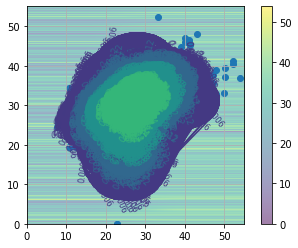

In [159]:
x,y = np.meshgrid(Ztrn[:,0], Ztrn[:,1])
pos = np.dstack((x,y))
rv = scipy.stats.multivariate_normal(mean, covmat)
# print(rv)
rr = np.random.multivariate_normal(mean, covmat, 5000)
# print(rr)
z = rv.pdf(pos)
# print(z)
plt.scatter(Ztrn[:,0], Ztrn[:,1])
contours = plt.contour(x,y,z, 5)
plt.clabel(contours, inline=True, fontsize=8)

plt.imshow(Ztrn, extent=[0, 55, 0, 55], origin='lower', alpha=0.5)
plt.colorbar()
plt.grid()

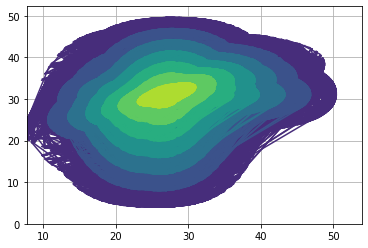

In [152]:
# plt.scatter(Ztrn[:,0], Ztrn[:,1])
plt.contour(Ztrn[:,0], Ztrn[:,1],z)
# plt.clabel(cs, inline =1, fontsize=10)
# plt.colorbar()
plt.grid()
plt.show()

In [ ]:
xmin, xmax = 0, 55
ymin, ymax = 0,55

def density_estimation(m1, m2):
    X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]                                                     
    positions = np.vstack([X.ravel(), Y.ravel()])                                                       
    values = np.vstack([m1, m2])                                                                        
    kernel = scipy.stats.gaussian_kde(values)                                                                 
    Z = np.reshape(kernel(positions).T, X.shape)
    return X, Y, Z

In [ ]:
X, Y, Z = density_estimation(Ztrn[:,0], Ztrn[:,1])

fig, ax = plt.subplots()                   

# Show density 
ax.imshow(np.rot90(Z), cmap=plt.cm.gist_earth_r,                                                    
          extent=[0,55,0,55])

# Add contour lines
plt.contour(X, Y, Z)                                                                           

ax.scatter(Ztrn[:,0], Ztrn[:,1], 'k.', markersize=2)    

ax.set_xlim([0,55])                                                                           
ax.set_ylim([0,55])                                                                           
plt.show()

In [156]:
clf = GaussianNB()

clf.fit(Ztrn.reshape(-1,1),newy)

ValueError: Found input variables with inconsistent numbers of samples: [636, 318]

In [95]:
uytrn = Ytrn[Ytrn==0]
newy = uytrn[xxtrn[:,4]>=1]
newy.shape

(318,)

In [112]:
from sklearn.datasets import make_blobs

x, y = make_blobs(n_samples = 100, centers=2, n_features = 1, random_state=2)


array([1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0])

In [153]:
# fig, ax = plt.subplots(figsize = (7,7))


# ax.scatter(x[:,0], x[:,1], c= newy, s=50, cmap="RdBu")
# ax.grid()

# xlim = (0, 55)
# ylim = (0, 55)

# xg = np.linspace(xlim[0], xlim[1], 60)
# yg = np.linspace(ylim[0], ylim[1], 40)
# x, y = np.meshgrid(xg, yg)
# Xgrid = np.vstack([x.ravel(), y.ravel()]).T

model = MultinomialNB()
model.fit(Ztrn, newy)
# for label, color in enumerate(['red','blue']):
    

MultinomialNB()